# Working with linear regression model

In [1]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

Text(0, 0.5, 'Y values')

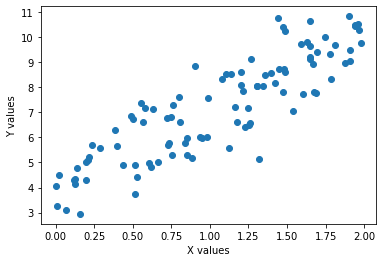

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("X values")
plt.ylabel("Y values")

In [3]:
x_b = np.c_[np.ones((100, 1)), x]

In [4]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.98387757],
       [3.07016345]])

In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)

In [6]:
y_predict

array([[ 3.98387757],
       [10.12420448]])

(0.0, 2.0, 0.0, 15.0)

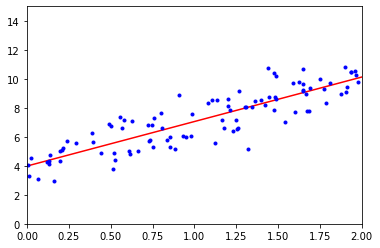

In [7]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, 'b. ')
plt.axis([0, 2, 0, 15])

### Performing linear regression sith Scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.predict(x_new)

array([[ 3.98387757],
       [10.12420448]])

In [9]:
lin_reg.intercept_

array([3.98387757])

In [10]:
lin_reg.coef_

array([[3.07016345]])

In [11]:
np.linalg.pinv(x_b).dot(y)

array([[3.98387757],
       [3.07016345]])

### Implementing custom batch gradient descent

In [12]:
learn_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    print("Theta")
    print(theta)
    print("-----")
    print("Gradients")
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - learn_rate * gradients
    print(gradients)
    print("-----")
    print("Gradients x Learn_rate")
    print(gradients * learn_rate)
    print("------------------")

Theta
[[-0.42730843]
 [ 1.18197757]]
-----
Gradients
[[-12.78478434]
 [-14.66048836]]
-----
Gradients x Learn_rate
[[-1.27847843]
 [-1.46604884]]
------------------
Theta
[[0.85117  ]
 [2.6480264]]
-----
Gradients
[[-7.15128187]
 [-7.78212125]]
-----
Gradients x Learn_rate
[[-0.71512819]
 [-0.77821212]]
------------------
Theta
[[1.56629819]
 [3.42623853]]
-----
Gradients
[[-4.08792499]
 [-4.05436726]]
-----
Gradients x Learn_rate
[[-0.4087925 ]
 [-0.40543673]]
------------------
Theta
[[1.97509069]
 [3.83167525]]
-----
Gradients
[[-2.41951937]
 [-2.03625195]]
-----
Gradients x Learn_rate
[[-0.24195194]
 [-0.2036252 ]]
------------------
Theta
[[2.21704262]
 [4.03530045]]
-----
Gradients
[[-1.50830218]
 [-0.94578749]]
-----
Gradients x Learn_rate
[[-0.15083022]
 [-0.09457875]]
------------------
Theta
[[2.36787284]
 [4.1298792 ]]
-----
Gradients
[[-1.00816552]
 [-0.35860662]]
-----
Gradients x Learn_rate
[[-0.10081655]
 [-0.03586066]]
------------------
Theta
[[2.46868939]
 [4.16573986

### Implementing custom stohastic gradient descent, with learning schedule

In [37]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [38]:
theta

array([[3.95293221],
       [3.07275386]])

### Implementing stohastic gradient descent with scikit learn

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [40]:
sgd_reg.intercept_

array([3.92407055])

In [41]:
sgd_reg.coef_

array([3.05806842])